In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("data/VOC_tracking.csv")

df['date'] = pd.to_datetime(df['week'], dayfirst=True)

df = df.drop(['week'], axis = 1)


#function to make province-wise dataset
def make_dataset():
    
    by_prov = pd.DataFrame()

    # Iterate through all the provinces
    for i in list(set(df.prov)):

        # Subset to the province
        sub = df[df['prov'] == i]

        # Add to the overall dataframe
        by_prov = by_prov.append(sub)
    
    return by_prov

#must pivot datasets for linear plot data so prov names are columns
def format_dataset(df):
    df_pivot = pd.pivot_table(df,
    columns = 'prov',
    index = 'date',
    values = 'total')
    
    df_pivot = df_pivot.rename_axis(None)

    return df_pivot

df_format_pivot = format_dataset(make_dataset())
df_format_pivot
df


,prov,total,date
0,Alberta,902,2021-03-14
1,British Columbia,667,2021-03-14
2,Manitoba,12,2021-03-14
3,New Brunswick,6,2021-03-14
4,Newfoundland and Labrador,88,2021-03-14
...,...,...,...
177,Prince Edward Island,26,2021-06-07
178,Quebec,6621,2021-06-07
179,Saskatchewan,5753,2021-06-07
180,Yukon,2,2021-06-07


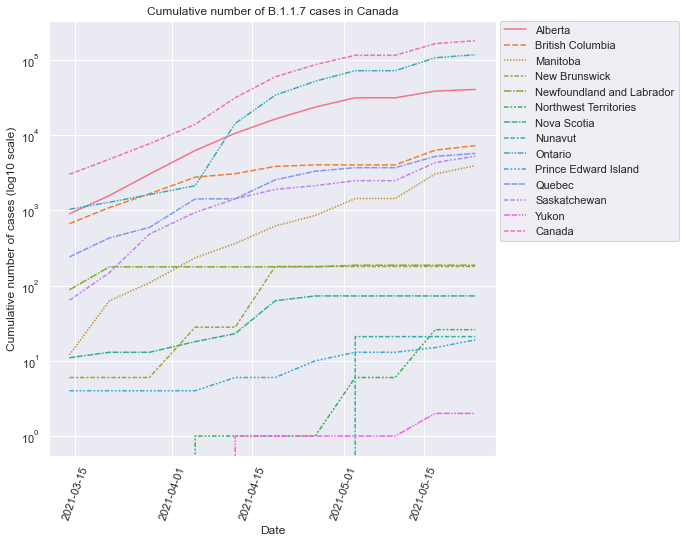

In [4]:
dims = (8, 8)
sns.set_theme(style = "darkgrid")
fig, ax = plt.subplots(figsize= dims)
sns.lineplot(x = "date", y = "total", hue = "prov", style = "prov", data=df)
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Cumulative number of B.1.1.7 cases in Canada")
plt.ylabel("Cumulative number of cases (log10 scale)")
plt.xlabel("Date")
plt.xticks(rotation=70)

#plt.show(f
plt.savefig('data/B.1.1.7_cases_Canada_log_May.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

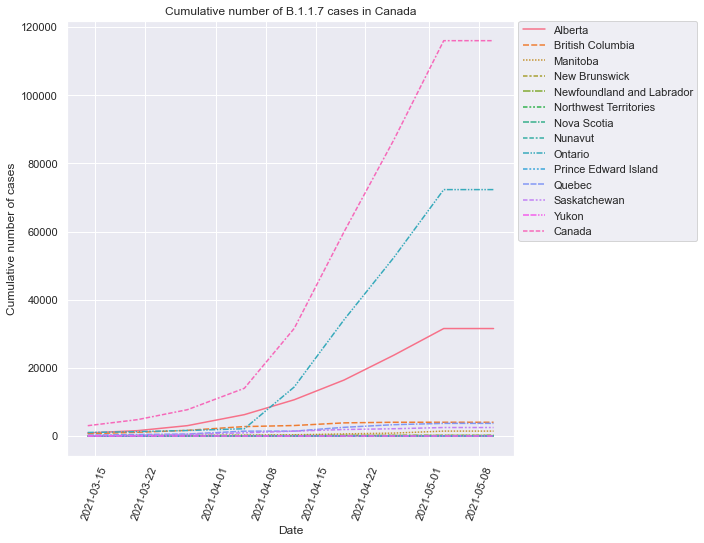

In [4]:
plt.clf()
sns.set_theme(style = "darkgrid")
fig, ax = plt.subplots(figsize= dims)
sns.lineplot(x = "date", y = "total", hue = "prov", style = "prov", data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Cumulative number of B.1.1.7 cases in Canada")
plt.ylabel("Cumulative number of cases")
plt.xlabel("Date")
plt.xticks(rotation=70)

plt.show(fig)

<Figure size 432x288 with 0 Axes>

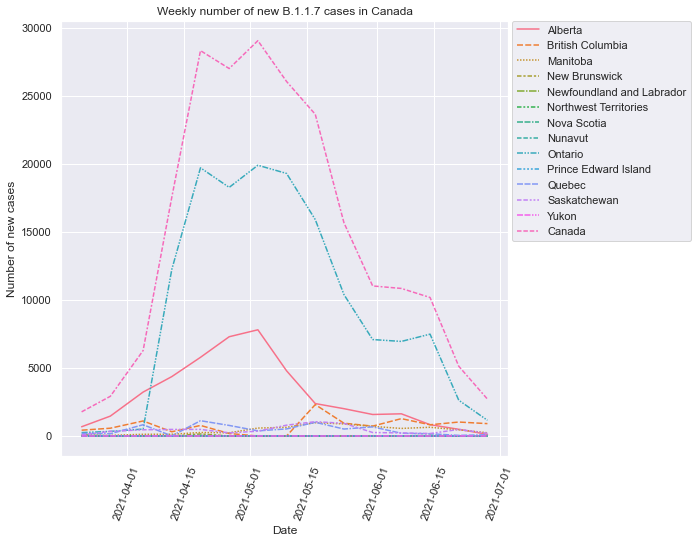

In [2]:
plt.clf()
new_cases = pd.read_csv("data/new_B117.csv")
new_cases['date'] = pd.to_datetime(new_cases['week'], dayfirst=True)

new_cases = new_cases.drop(['week'], axis = 1)

dims = (8, 8)
sns.set_theme(style = "darkgrid")
fig, ax = plt.subplots(figsize= dims)
sns.lineplot(x = "date", y = "total", hue = "prov", style = "prov", data=new_cases)
#plt.yscale("log")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Weekly number of new B.1.1.7 cases in Canada")
plt.ylabel("Number of new cases")
plt.xlabel("Date")
plt.xticks(rotation=70)

plt.show(fig)
#plt.savefig('data/Weekly_new_B.1.1.7_cases_Canada_May.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

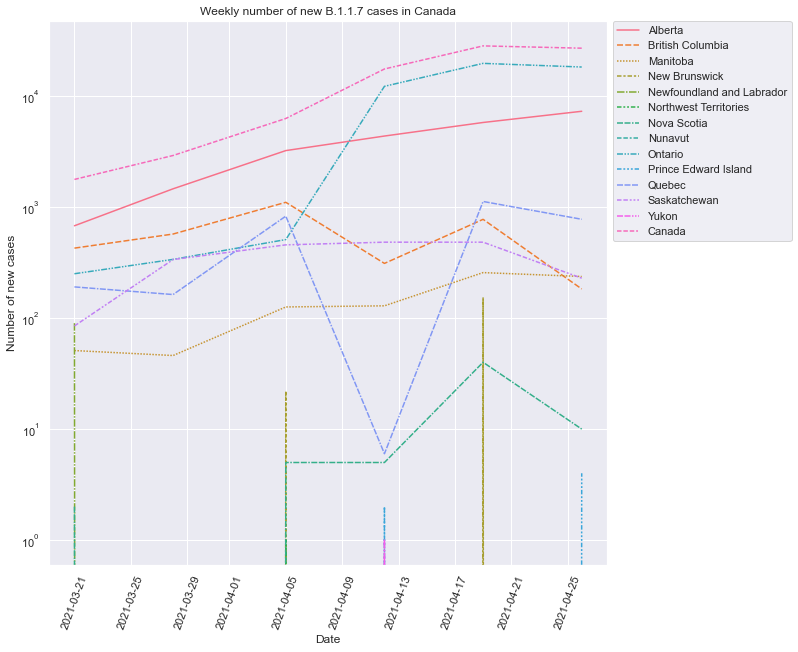

In [25]:
plt.clf()
dims = (10, 10)
sns.set_theme(style = "darkgrid")
fig, ax = plt.subplots(figsize= dims)
sns.lineplot(x = "date", y = "total", hue = "prov", style = "prov", data=new_cases)
#plt.yscale("log")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Weekly number of new B.1.1.7 cases in Canada")
plt.ylabel("Number of new cases")
plt.xlabel("Date")
plt.xticks(rotation=70)

plt.show(fig)
#plt.savefig('data/B.1.1.7_cases_Canada_log_25Apr.png', bbox_inches='tight')

In [16]:
cases = pd.read_csv("data/cases.csv")
cases['date'] = pd.to_datetime(cases['date'], dayfirst=True)
print(new_cases.columns)
print(cases.columns)
cases.rename({'week_cases': 'total cases'}, axis=1, inplace = True)
new_cases.rename({'prov':'region', 'total':'alpha cases'}, axis=1, inplace=True)
print(new_cases.columns)
print(cases.columns)


Index(['region', 'alpha cases', 'date'], dtype='object')
Index(['date', 'region', 'week_cases'], dtype='object')
Index(['region', 'alpha cases', 'date'], dtype='object')
Index(['date', 'region', 'total cases'], dtype='object')


In [20]:
merged = new_cases.merge(cases, on=['region', 'date'])
merged = merged[['date', 'region', 'total cases', 'alpha cases']]
merged['cases'] = merged['total cases'] - merged['alpha cases']
merged.drop(['total cases'], axis = 1, inplace = True)
mergedCanada = merged[merged['region'] == 'Canada']
print(mergedCanada)
mergedCanada = mergedCanada.drop(['region'], axis = 1)
alpha = mergedCanada
canadacases = mergedCanada
alpha = alpha.drop(['cases'], axis = 1)
alpha['type'] = 'alpha'
alpha.rename({'alpha cases': 'cases'}, axis=1, inplace = True)
canadacases = canadacases.drop(['alpha cases'], axis = 1)
canadacases['type'] = 'total'
canadaplot = pd.concat([canadacases, alpha], ignore_index = True)

canadaplot
canadaplot.to_csv('data/canadaplot.csv', index = False)

          date  region  alpha cases    cases
13  2021-03-21  Canada         1776  22962.0
27  2021-03-28  Canada         2918  29289.0
41  2021-04-05  Canada         6285  36369.0
55  2021-04-12  Canada        17557  39084.0
69  2021-04-19  Canada        28344  32409.0
83  2021-04-26  Canada        27027  29123.0
97  2021-05-03  Canada        29077  26267.0
111 2021-05-10  Canada        26074  24864.0
125 2021-05-17  Canada        23660  16247.0
139 2021-05-24  Canada        15684  13220.0
153 2021-05-31  Canada        11036   7527.0
167 2021-06-07  Canada        10853   1716.0
181 2021-06-14  Canada        10189  -1047.0
195 2021-06-21  Canada         5132   1163.0
209 2021-06-28  Canada         2714   1841.0


AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 432x288 with 0 Axes>

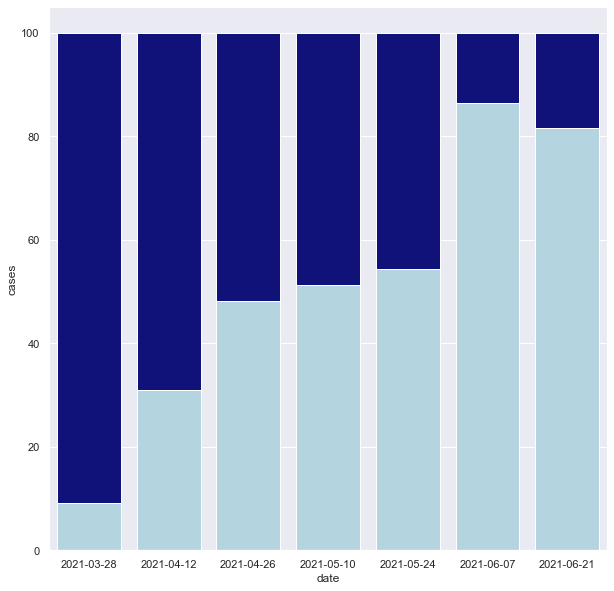

In [22]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 10))

import matplotlib.patches as mpatches
import matplotlib.dates as mdates

canadaplot = pd.read_csv("data/canadaplot.csv")

# from raw value to percentage
total = canadaplot.groupby('date')['cases'].sum().reset_index()
B = canadaplot[canadaplot.type=='alpha'].groupby('date')['cases'].sum().reset_index()
B['cases'] = [i / j * 100 for i,j in zip(B['cases'], total['cases'])]
total['cases'] = [i / j * 100 for i,j in zip(total['cases'], total['cases'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="date",  y="cases", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="date", y="cases", data=B, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Other Variants')
bottom_bar = mpatches.Patch(color='lightblue', label='alpha')

x_dates = canadaplot['date'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('week ending')
plt.ylabel('percent of cases')
plt.title('Percent of SARS-CoV-2 cases that are variant alpha by week in Canada')


# show the graph
#plt.show()
plt.savefig('data/B.1.1.7_case_proportion_Canada.png')

In [30]:
import numpy as np
merged = new_cases.merge(cases, on=['region', 'date'])
merged = merged[['date', 'region', 'total cases', 'alpha cases']]
merged['proportion'] = merged['alpha cases'] / merged['total cases']
merged['proportion'].fillna(0.0, inplace = True)
merged.replace([np.inf], np.nan)
merged['proportion'] = merged['proportion'].abs()

print(merged)
merged.to_csv('data/alphaplot.csv', index = False)

subset = merged.loc[merged['region'].isin(['British Columbia', 'Alberta', 'Canada', 'Ontario', 'Quebec'])]
subset.to_csv('data/subsetalphaplot.csv', index=False)
'''
alpha = mergedCanada
canadacases = mergedCanada
alpha = alpha.drop(['cases'], axis = 1)
alpha['type'] = 'alpha'
alpha.rename({'alpha cases': 'cases'}, axis=1, inplace = True)
canadacases = canadacases.drop(['alpha cases'], axis = 1)
canadacases['type'] = 'total'
canadaplot = pd.concat([canadacases, alpha], ignore_index = True)
'''


          date                     region  total cases  alpha cases  \
0   2021-03-21                    Alberta       3510.0          679   
1   2021-03-21           British Columbia       4027.0          427   
2   2021-03-21                   Manitoba        609.0           51   
3   2021-03-21              New Brunswick         20.0            0   
4   2021-03-21  Newfoundland and Labrador          2.0           90   
..         ...                        ...          ...          ...   
205 2021-06-28       Prince Edward Island          0.0            0   
206 2021-06-28                     Quebec        649.0           94   
207 2021-06-28               Saskatchewan        302.0          198   
208 2021-06-28                      Yukon        121.0            0   
209 2021-06-28                     Canada       4555.0         2714   

     proportion  
0      0.193447  
1      0.106034  
2      0.083744  
3      0.000000  
4     45.000000  
..          ...  
205    0.000000  
206

"\nalpha = mergedCanada\ncanadacases = mergedCanada\nalpha = alpha.drop(['cases'], axis = 1)\nalpha['type'] = 'alpha'\nalpha.rename({'alpha cases': 'cases'}, axis=1, inplace = True)\ncanadacases = canadacases.drop(['alpha cases'], axis = 1)\ncanadacases['type'] = 'total'\ncanadaplot = pd.concat([canadacases, alpha], ignore_index = True)\n"